In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **DATA PROCESSING**

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/KingBambara/CO2_Emission_CAR/main/my1995-2024-fuel-consumption-ratings.csv")
data_desc = pd.read_csv("https://raw.githubusercontent.com/KingBambara/CO2_Emission_CAR/main/Data%20Description.csv")

In [ ]:
data.describe()

,Model year,Engine size (L),Cylinders,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
count,27696.000000,27696.000000,27696.000000,27696.000000,27696.000000,27696.000000,27696.000000,27696.000000,8802.000000,7696.000000
mean,2010.390995,3.341277,5.828820,12.798931,8.969346,11.076163,27.249458,252.043580,4.628266,4.821985
std,8.172961,1.341511,1.805724,3.467110,2.276549,2.890522,7.315695,60.356796,1.581469,1.785805
min,1995.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000,1.000000,1.000000
25%,2004.000000,2.200000,4.000000,10.500000,7.400000,9.100000,22.000000,210.000000,4.000000,3.000000
50%,2011.000000,3.000000,6.000000,12.300000,8.500000,10.600000,27.000000,245.000000,5.000000,5.000000
75%,2017.000000,4.200000,8.000000,14.800000,10.300000,12.800000,31.000000,291.000000,6.000000,6.000000
max,2024.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000,10.000000,8.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27696 entries, 0 to 27695
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model year            27696 non-null  int64  
 1   Make                  27696 non-null  object 
 2   Model                 27696 non-null  object 
 3   Vehicle class         27696 non-null  object 
 4   Engine size (L)       27696 non-null  float64
 5   Cylinders             27696 non-null  int64  
 6   Transmission          27696 non-null  object 
 7   Fuel type             27696 non-null  object 
 8   City (L/100 km)       27696 non-null  float64
 9   Highway (L/100 km)    27696 non-null  float64
 10  Combined (L/100 km)   27696 non-null  float64
 11  Combined (mpg)        27696 non-null  int64  
 12  CO2 emissions (g/km)  27696 non-null  int64  
 13  CO2 rating            8802 non-null   float64
 14  Smog rating           7696 non-null   float64
dtypes: float64(6), int6

In [ ]:
data['Vehicle class'].unique()

array(['Subcompact', 'Compact', 'Two-seater', 'Station wagon: Small',
       'Minicompact', 'Mid-size', 'Full-size', 'Station wagon: Mid-size',
       'Van: Cargo', 'Van: Passenger', 'Pickup truck: Standard',
       'Sport utility vehicle', 'Minivan', 'Pickup truck: Small',
       'Special purpose vehicle', 'Sport utility vehicle: Small',
       'Sport utility vehicle: Standard'], dtype=object)

In [ ]:
data.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,1995,Acura,Integra,Subcompact,1.8,4,A4,X,10.2,7.0,8.8,32,202,NaN,NaN
1,1995,Acura,Integra,Subcompact,1.8,4,M5,X,9.6,7.0,8.4,34,193,NaN,NaN
2,1995,Acura,Integra GS-R,Subcompact,1.8,4,M5,Z,9.4,7.0,8.3,34,191,NaN,NaN
3,1995,Acura,Legend,Compact,3.2,6,A4,Z,12.6,8.9,10.9,26,251,NaN,NaN
4,1995,Acura,Legend Coupe,Compact,3.2,6,A4,Z,13.0,9.3,11.3,25,260,NaN,NaN


In [ ]:
data.isnull().sum()

Model year                  0
Make                        0
Model                       0
Vehicle class               0
Engine size (L)             0
Cylinders                   0
Transmission                0
Fuel type                   0
City (L/100 km)             0
Highway (L/100 km)          0
Combined (L/100 km)         0
Combined (mpg)              0
CO2 emissions (g/km)        0
CO2 rating              18894
Smog rating             20000
dtype: int64

In [ ]:
data_desc

,Understanding the Data,Unnamed: 1
0,Model,4WD/4X4 = Four-wheel drive
1,NaN,AWD = All-wheel drive
2,NaN,FFV = Flexible-fuel vehicle
3,NaN,SWB = Short wheelbase
4,NaN,LWB = Long wheelbase
5,NaN,EWB = Extended wheelbase
6,Transmission,A = automatic
7,NaN,AM = automated manual
8,NaN,AS = automatic with select shift
9,NaN,AV = continuously variable


# **DATA VIZUALISATION & ANALYSIS**



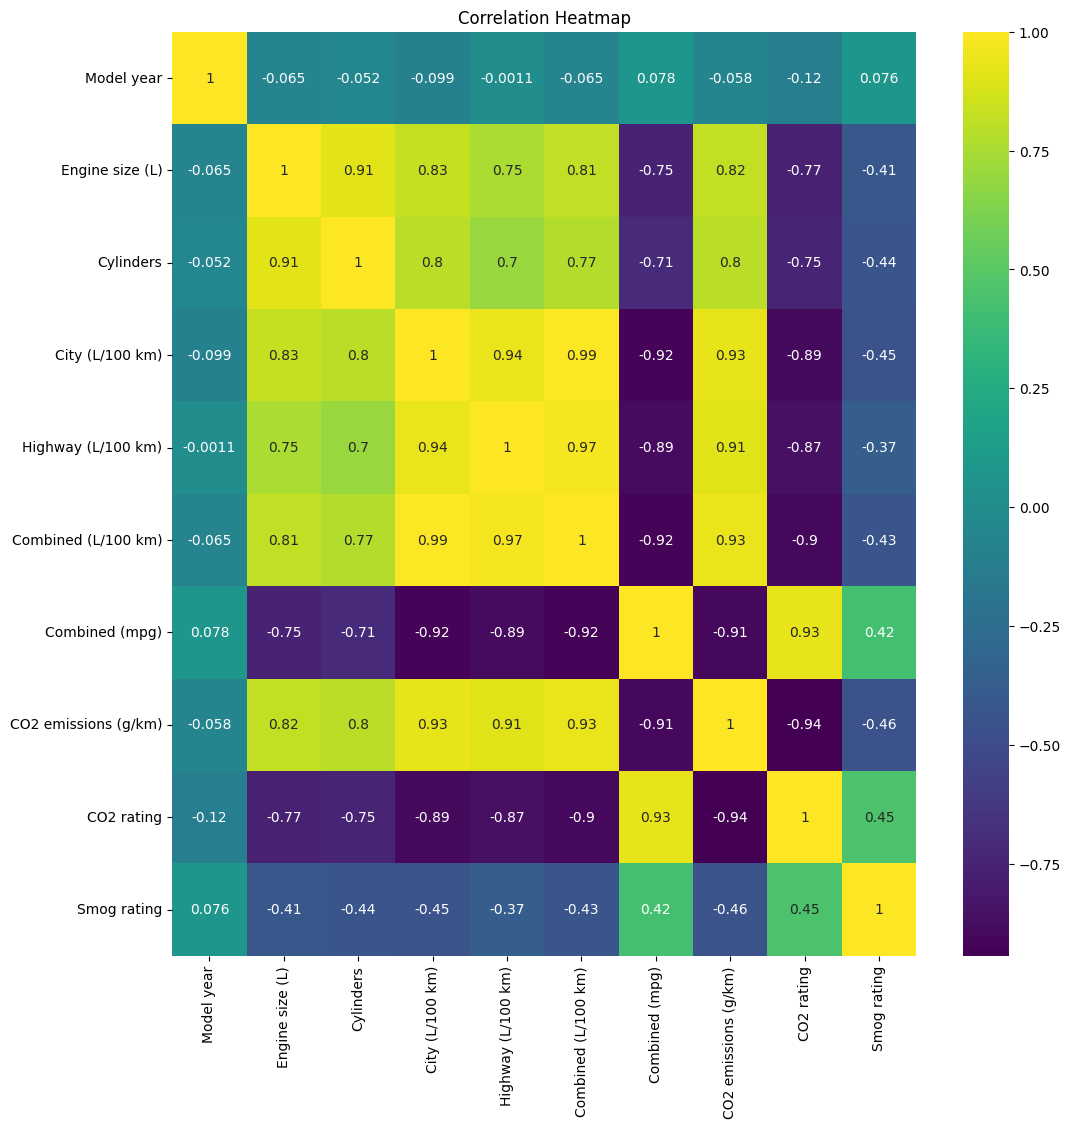

In [ ]:
# Heatmap pour voir les corrélations entre les valeurs numériques des colonnes
numeric_columns = data.select_dtypes(exclude=['object'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(correlation_matrix, cmap = 'viridis', annot = True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#plt.figure(figsize=(18,6))
#sns.pairplot(data, hue='CO2 emissions (g/km)')

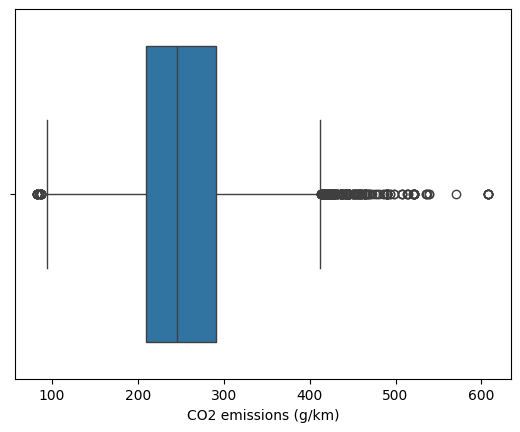

In [ ]:
# box plot pour les émissions de CO2
sns.boxplot(x = data['CO2 emissions (g/km)'])
plt.show()

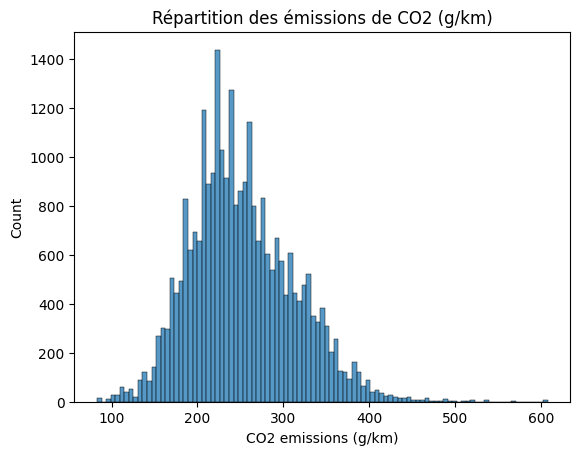

In [ ]:
#histplot pour la distribution normale des valeurs de CO2
sns.histplot(x = data['CO2 emissions (g/km)'])
plt.title('Répartition des émissions de CO2 (g/km)')
plt.show()

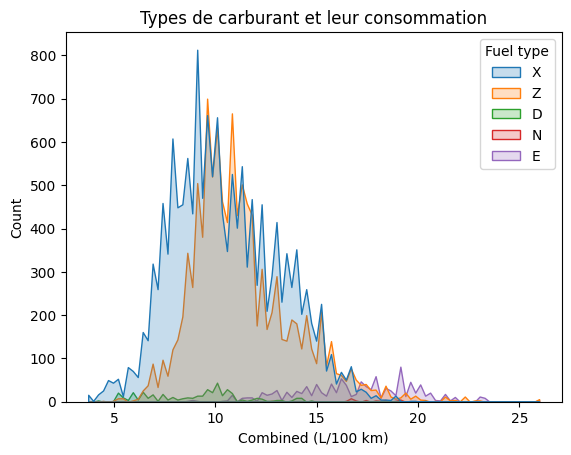

In [ ]:
sns.histplot(data, x = "Combined (L/100 km)", hue = "Fuel type", element = "poly")
plt.title('Types de carburant et leur consommation')
plt.show()

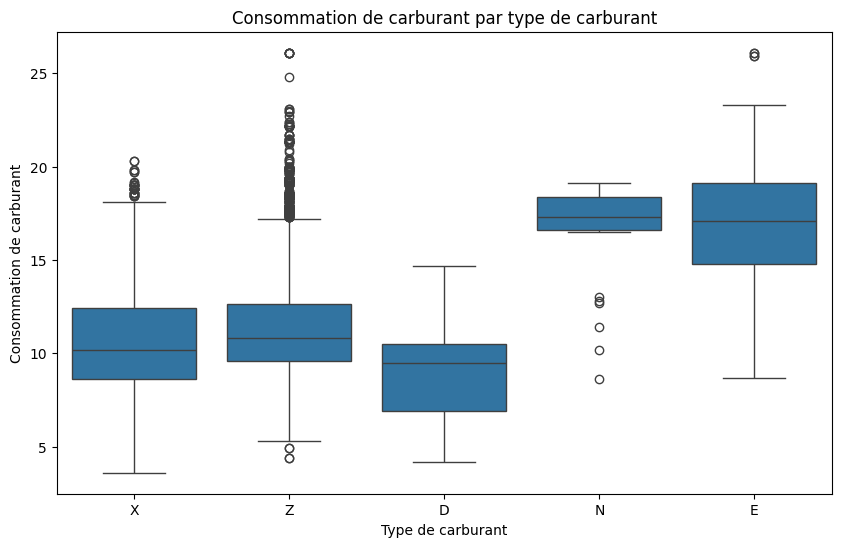

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Fuel type', y = 'Combined (L/100 km)', data = data)
plt.title('Consommation de carburant par type de carburant')
plt.xlabel('Type de carburant')
plt.ylabel('Consommation de carburant')
plt.show()

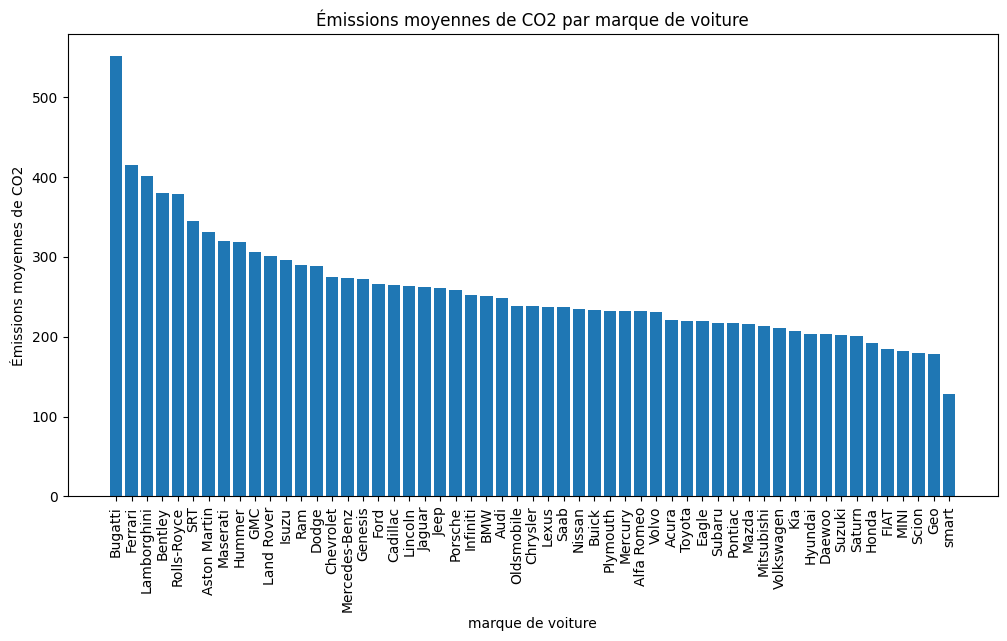

In [ ]:
plt.figure(figsize = (12, 6))
mean_emissions_by_make = data.groupby('Make')['CO2 emissions (g/km)'].mean().sort_values(ascending=False)
plt.bar(mean_emissions_by_make.index, mean_emissions_by_make)
plt.title("Émissions moyennes de CO2 par marque de voiture")
plt.xlabel("marque de voiture")
plt.ylabel("Émissions moyennes de CO2")
plt.xticks(rotation = 90)
plt.show()

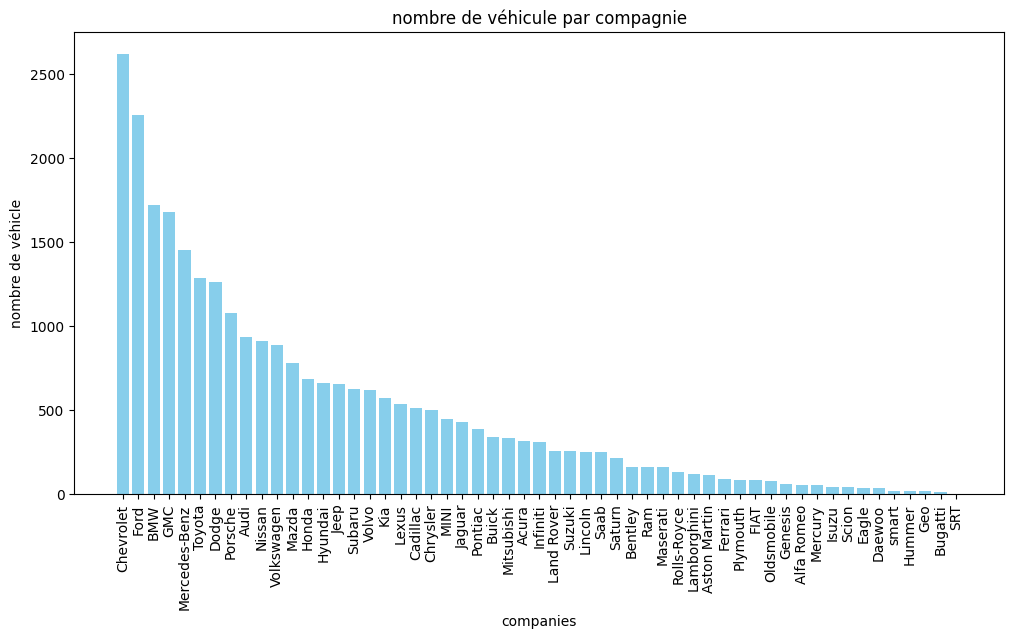

In [ ]:
emissions_make = data['Make'].value_counts()


plt.figure(figsize=(12, 6))
plt.bar(emissions_make.index, emissions_make, color = 'skyblue')

plt.title('nombre de véhicule par compagnie')
plt.xlabel('companies')
plt.ylabel('nombre de véhicle')
plt.xticks(rotation = 90)
plt.show()

# **DATA CLEANING**

In [ ]:
col = ['Make', 'Engine size (L)', 'Cylinders', 'Fuel type', 'Combined (L/100 km)', 'CO2 emissions (g/km)' ]

data_col = data[col]

In [ ]:
data_col.head()

,Make,Engine size (L),Cylinders,Fuel type,Combined (L/100 km),CO2 emissions (g/km)
0,Acura,1.8,4,X,8.8,202
1,Acura,1.8,4,X,8.4,193
2,Acura,1.8,4,Z,8.3,191
3,Acura,3.2,6,Z,10.9,251
4,Acura,3.2,6,Z,11.3,260


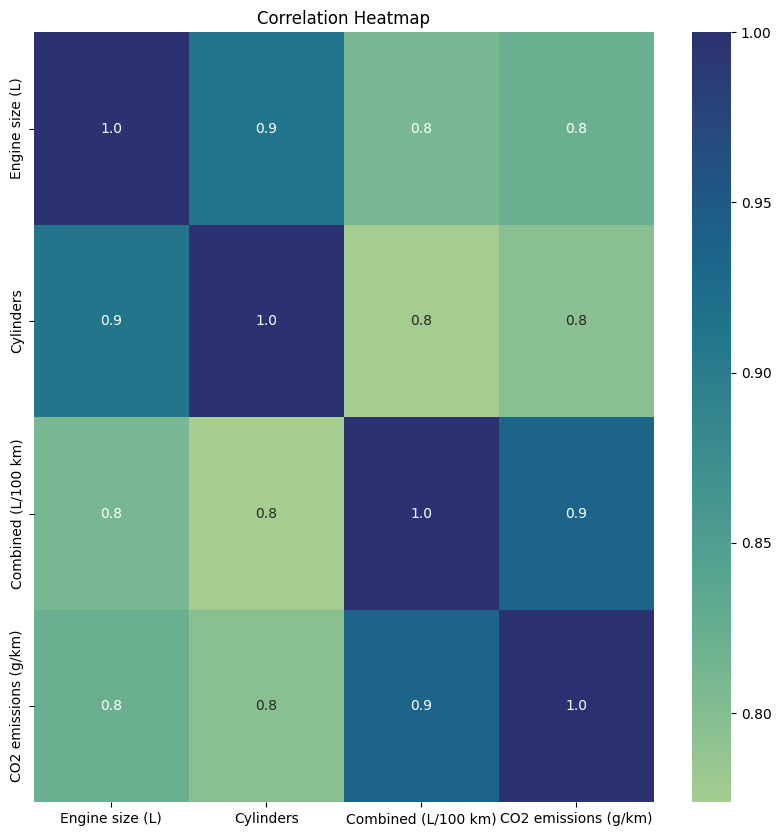

In [ ]:
numeric_columns = data_col.select_dtypes(exclude=['object'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_matrix, cmap = 'crest', annot = True, fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

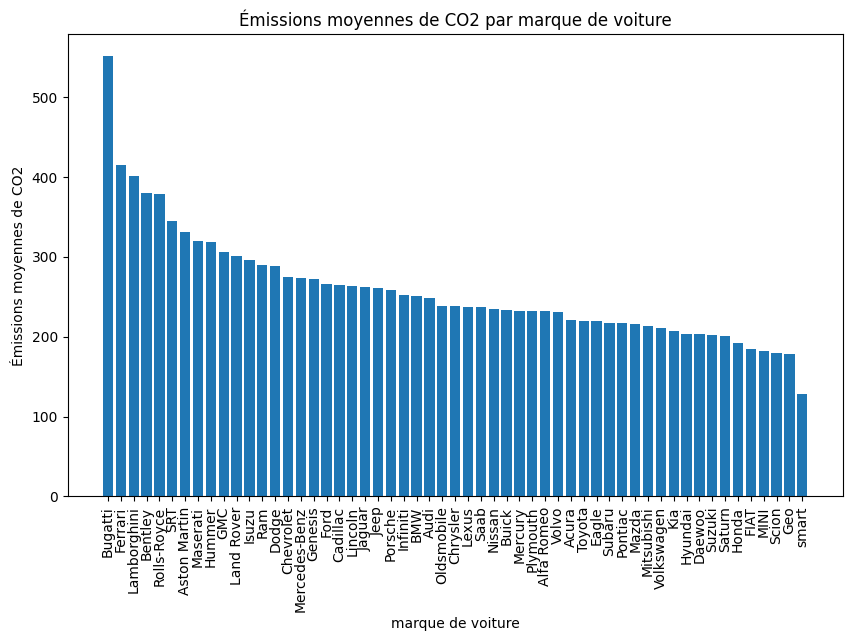

In [ ]:
plt.figure(figsize = (10, 6))
mean_emissions_by_make = data_col.groupby('Make')['CO2 emissions (g/km)'].mean().sort_values(ascending=False)
plt.bar(mean_emissions_by_make.index, mean_emissions_by_make)
plt.title("Émissions moyennes de CO2 par marque de voiture")
plt.xlabel("marque de voiture")
plt.ylabel("Émissions moyennes de CO2")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#removal of natural gas lines
idex = data_col[data_col['Fuel type'] == 'N' ].index
data_col = data_col.drop(idex)

### Transform column Fuel type into characteristic

In [ ]:
dums = pd.get_dummies(data_col['Fuel type'],prefix="Fuel_Type", dtype= int)
frames = [data_col, dums]
result = pd.concat(frames,axis=1)
result.rename(columns={'Fuel_Type_D': 'diesel', 'Fuel_Type_E': 'ethanol (E85)',
                       'Fuel_Type_X': 'regular gasoline', 'Fuel_Type_Z': 'premium gasoline'}, inplace = True)
result.head()

,Make,Engine size (L),Cylinders,Fuel type,Combined (L/100 km),CO2 emissions (g/km),diesel,ethanol (E85),regular gasoline,premium gasoline
0,Acura,1.8,4,X,8.8,202,0,0,1,0
1,Acura,1.8,4,X,8.4,193,0,0,1,0
2,Acura,1.8,4,Z,8.3,191,0,0,0,1
3,Acura,3.2,6,Z,10.9,251,0,0,0,1
4,Acura,3.2,6,Z,11.3,260,0,0,0,1


In [ ]:
#removal of Fuel type and Make
result.drop(['Fuel type'],inplace=True,axis=1)
result.drop(['Make'],inplace=True,axis=1)
result.head()

,Engine size (L),Cylinders,Combined (L/100 km),CO2 emissions (g/km),diesel,ethanol (E85),regular gasoline,premium gasoline
0,1.8,4,8.8,202,0,0,1,0
1,1.8,4,8.4,193,0,0,1,0
2,1.8,4,8.3,191,0,0,0,1
3,3.2,6,10.9,251,0,0,0,1
4,3.2,6,11.3,260,0,0,0,1


In [ ]:
X = result.drop(['CO2 emissions (g/km)'], axis= 1)
X = X.values
y = result["CO2 emissions (g/km)"].values

In [ ]:
X.shape

(27657, 7)

### Splitting the dataset into the training set and test set

---
80% for training set

20% for test set






In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

X_train (22125, 7)
y_train (22125,)
X_test (5532, 7)
y_test (5532,)


In [ ]:
#training set and test set for Decision Tree Regression & Random Forest Regression
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train

array([[ 4.3,  6. , 13.3, ...,  0. ,  1. ,  0. ],
       [ 5. ,  8. , 14.8, ...,  0. ,  0. ,  1. ],
       [ 3. ,  6. , 12.5, ...,  0. ,  1. ,  0. ],
       ...,
       [ 3.8,  6. , 13.2, ...,  0. ,  1. ,  0. ],
       [ 3.7,  5. , 13.8, ...,  0. ,  1. ,  0. ],
       [ 2.2,  4. ,  8.8, ...,  0. ,  1. ,  0. ]])

### **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, :3] = sc.fit_transform(X_train[:, :3])
X_test[:, :3] = sc.transform(X_test[:, :3])

In [ ]:
X_train

array([[ 0.71858247,  0.09592895,  0.77205861, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.24201655,  1.20947989,  1.29269695, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25350939,  0.09592895,  0.49438483, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.34470099,  0.09592895,  0.73734939, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.26992469, -0.46084651,  0.94560472, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85171977, -1.01762198, -0.7898564 , ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
X_train_

array([[ 4.3,  6. , 13.3, ...,  0. ,  1. ,  0. ],
       [ 5. ,  8. , 14.8, ...,  0. ,  0. ,  1. ],
       [ 3. ,  6. , 12.5, ...,  0. ,  1. ,  0. ],
       ...,
       [ 3.8,  6. , 13.2, ...,  0. ,  1. ,  0. ],
       [ 3.7,  5. , 13.8, ...,  0. ,  1. ,  0. ],
       [ 2.2,  4. ,  8.8, ...,  0. ,  1. ,  0. ]])

# **Prediction**

### **Linear Regression**

In [ ]:
from sklearn.metrics import accuracy_score, mean_absolute_error as mae, r2_score, mean_squared_error as mse

np.random.seed(0)

from sklearn.linear_model import LinearRegression
model_lr= LinearRegression()
model_lr.fit(X_train, y_train)

y_pred= model_lr.predict(X_test)

model_lr_score = model_lr.score(X_test, y_test)
MSE = round(np.sqrt(mse(y_test,y_pred)),4)

lr_R2 = r2_score(y_test,y_pred)
lr_RMSE = np.sqrt(MSE)
lr_mae = mae(y_test, y_pred)

print('test Score : ', model_lr_score)
print('Mean Squared Error (MSE): ',MSE)
print('R- Squared (R-square): ',lr_R2)
print('Root Mean Squared Error (RMSE): ',lr_RMSE)
print('Mean Absolute error (MAE): ',lr_mae)

test Score :  0.9931191941118155
Mean Squared Error (MSE):  5.0566
R- Squared (R-square):  0.9931191941118155
Root Mean Squared Error (RMSE):  2.248688506663384
Mean Absolute error (MAE):  2.735509748941347


### **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

model_ridge_reg = Ridge(random_state = 0)
model_ridge_reg.fit(X_train,y_train)
y_pred= model_ridge_reg.predict(X_test)

model_ridge_reg_score = model_ridge_reg.score(X_test, y_test)
MSE = round(np.sqrt(mse(y_test,y_pred)),4)
ridge_reg_R2 = r2_score(y_test,y_pred)
ridge_reg_RMSE = np.sqrt(MSE)
ridge_reg_mae = mae(y_test,y_pred)
print('test Score : ', model_ridge_reg_score)
print('Mean Squared Error (MSE): ',MSE)
print('R- Squared (R-square): ',ridge_reg_R2)
print('Root Mean Squared Error (RMSE): ',ridge_reg_RMSE)
print('Mean Absolute error (MAE): ', ridge_reg_mae)

test Score :  0.9931232975207608
Mean Squared Error (MSE):  5.0551
R- Squared (R-square):  0.9931232975207608
Root Mean Squared Error (RMSE):  2.248354954183169
Mean Absolute error (MAE):  2.7383137560364723


### **SVR**

In [ ]:
from sklearn.svm import SVR
np.random.seed(0)

model_svr = SVR(kernel = 'linear', C=1.0, epsilon=0.2)
model_svr.fit(X_train,y_train)
y_pred= model_svr.predict(X_test)

model_svr_score = model_svr.score(X_test, y_test)
MSE = round(np.sqrt(mse(y_test,y_pred)),4)
svr_R2 = r2_score(y_test,y_pred)
svr_RMSE = np.sqrt(MSE)
svr_mae = mae(y_test,y_pred)
print('test Score : ', model_svr_score)
print('Mean Squared Error (MSE): ',MSE)
print('R- Squared (R-square): ',svr_R2)
print('Root Mean Squared Error (RMSE): ',svr_RMSE)
print('Mean Absolute error (MAE): ', svr_mae)

test Score :  0.9926767064793288
Mean Squared Error (MSE):  5.2166
R- Squared (R-square):  0.9926767064793288
Root Mean Squared Error (RMSE):  2.283987740772704
Mean Absolute error (MAE):  2.349127732105388


### **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

model_la_reg = Lasso(random_state = 0)
model_la_reg.fit(X_train,y_train)
y_pred= model_la_reg.predict(X_test)

model_la_reg_score = model_la_reg.score(X_test, y_test)
MSE = round(np.sqrt(mse(y_test,y_pred)),4)
la_reg_R2 = r2_score(y_test,y_pred)
la_reg_RMSE = np.sqrt(MSE)
la_reg_mae = mae(y_test,y_pred)
print('test Score : ', model_la_reg_score)
print('Mean Squared Error (MSE): ',MSE)
print('R- Squared (R-square): ',la_reg_R2)
print('Root Mean Squared Error (RMSE): ',la_reg_RMSE)
print('Mean Absolute error (MAE): ', la_reg_mae)

test Score :  0.9780185199078314
Mean Squared Error (MSE):  9.0378
R- Squared (R-square):  0.9780185199078314
Root Mean Squared Error (RMSE):  3.0062933988551417
Mean Absolute error (MAE):  5.714426826710827



### **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_dt_reg = DecisionTreeRegressor(criterion = 'squared_error', splitter = 'best', random_state = 0, max_depth = 12)
model_dt_reg.fit(X_train_,y_train_)
y_pred_dtr= model_dt_reg.predict(X_test_)

model_dt_reg_score = model_dt_reg.score(X_test_, y_test_)
MSE = round(np.sqrt(mse(y_test_,y_pred_dtr)),4)
dt_reg_R2 = r2_score(y_test_,y_pred_dtr)
dt_reg_RMSE = np.sqrt(MSE)
dt_reg_mae = mae(y_test_, y_pred_dtr)
print('test Score : ', model_dt_reg_score)
print('Mean Squared Error (MSE): ',MSE)
print('R- Squared (R-square): ',dt_reg_R2)
print('Root Mean Squared Error (RMSE): ',dt_reg_RMSE)
print('Mean Absolute error (MAE): ',dt_reg_mae)

test Score :  0.9984268270259863
Mean Squared Error (MSE):  2.4178
R- Squared (R-square):  0.9984268270259863
Root Mean Squared Error (RMSE):  1.5549276510500416
Mean Absolute error (MAE):  1.5230069889099251


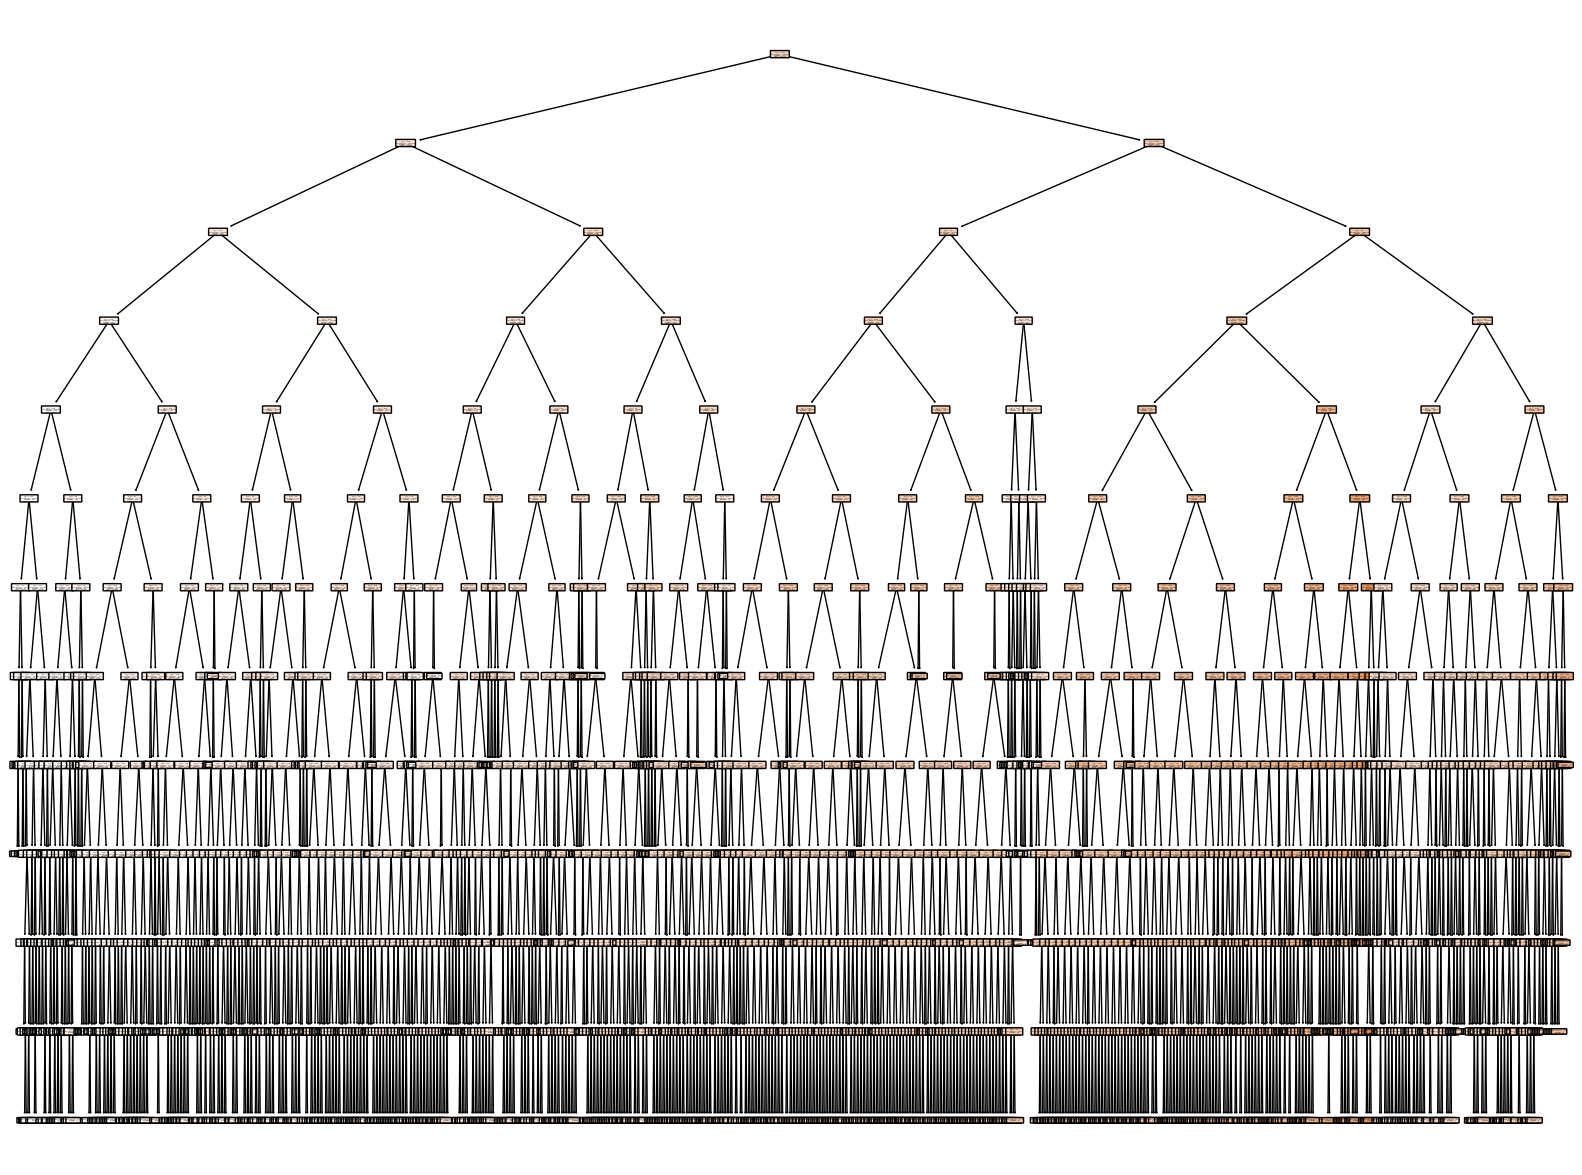

In [ ]:
from sklearn import tree
plt.figure(figsize=(20, 15))
tree.plot_tree(model_dt_reg, rounded = True, filled=True)
plt.show()

### **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf_reg = RandomForestRegressor(n_estimators = 17, criterion = 'poisson', max_depth = 9, random_state = 0)
model_rf_reg.fit(X_train_, y_train_)
y_pred_rf= model_rf_reg.predict(X_test_)
model_rf_reg_score = model_rf_reg.score(X_test_, y_test_)
MSE = round(np.sqrt(mse(y_test_,y_pred_rf)),4)
rf_reg_R2 = r2_score(y_test_,y_pred)
rf_reg_RMSE = np.sqrt(MSE)
rf_reg_mae = mae(y_test_,y_pred_rf)
print('test Score : ', model_rf_reg_score)
print('Mean Squared Error (MSE): ',MSE)
print('R- Squared (R-square): ',rf_reg_R2)
print('Root Mean Squared Error (RMSE): ',rf_reg_RMSE)
print('Mean Absolute error (MAE): ', rf_reg_mae)

test Score :  0.9982128832065532
Mean Squared Error (MSE):  2.577
R- Squared (R-square):  0.9780185199078314
Root Mean Squared Error (RMSE):  1.605303709582707
Mean Absolute error (MAE):  1.8874738746708333


### **XGBoost**

In [ ]:
from xgboost import XGBRegressor

XGB = XGBRegressor()
XGB.fit(X_train_,y_train_)
y_pred_XGB= XGB.predict(X_test_)

XGB_score = XGB.score(X_test_, y_test_)
MSE = round(np.sqrt(mse(y_test_,y_pred_XGB)),4)
XGB_R2 = r2_score(y_test_,y_pred_XGB)
XGB_RMSE = np.sqrt(MSE)
XGB_mae = mae(y_test_,y_pred_XGB)
print('train Score : ', XGB.score(X_train_, y_train_))
print('test Score : ', XGB_score)
print('Mean Squared Error (MSE): ',MSE)
print('R- Squared (R-square): ',XGB_R2)
print('Root Mean Squared Error (RMSE): ',XGB_RMSE)
print('Mean Absolute error (MAE): ', XGB_mae)

train Score :  0.9989614730962194
test Score :  0.998674800840908
Mean Squared Error (MSE):  2.2191
R- Squared (R-square):  0.998674800840908
Root Mean Squared Error (RMSE):  1.4896643917339234
Mean Absolute error (MAE):  1.4313343624575623


### **Best algorithm**

In [ ]:
best_score_rmse = pd.DataFrame({
    'Name' : ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor',
              'Ridge Regression', 'SVR', 'Lasso Regression', 'XGBoost'],
    'R2 Score' : [lr_R2, dt_reg_R2, rf_reg_R2, ridge_reg_R2, svr_R2, la_reg_R2, XGB_R2],
    'RMSE' : [lr_RMSE, dt_reg_RMSE, rf_reg_RMSE, ridge_reg_RMSE, svr_RMSE, la_reg_RMSE, XGB_RMSE],
    'MAE' : [lr_mae, dt_reg_mae, rf_reg_mae, ridge_reg_mae, svr_mae, la_reg_mae, XGB_mae]
})
best_score_rmse

,Name,R2 Score,RMSE,MAE
0,Linear Regression,0.993119,2.248689,2.735510
1,Decision Tree Regressor,0.998427,1.554928,1.523007
2,Random Forest Regressor,0.978019,1.605304,1.887474
3,Ridge Regression,0.993123,2.248355,2.738314
4,SVR,0.992677,2.283988,2.349128
5,Lasso Regression,0.978019,3.006293,5.714427
6,XGBoost,0.998675,1.489664,1.431334


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Decision Tree Regressor'),
  Text(2, 0, 'Random Forest Regressor'),
  Text(3, 0, 'Ridge Regression'),
  Text(4, 0, 'SVR'),
  Text(5, 0, 'Lasso Regression'),
  Text(6, 0, 'XGBoost')])

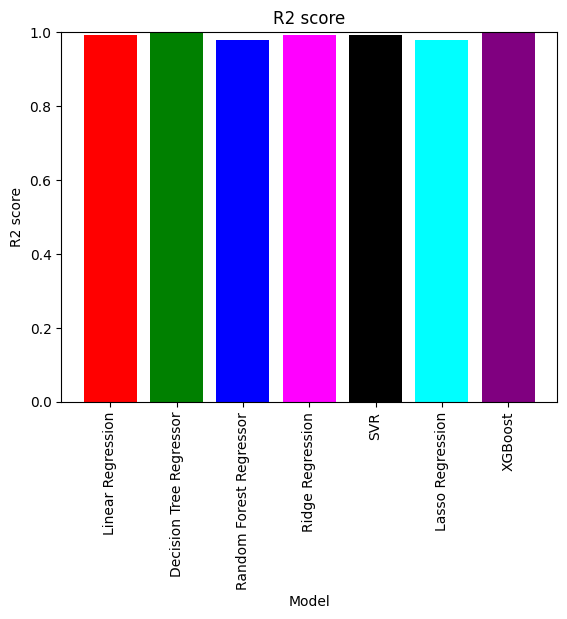

In [ ]:
plt.title('R2 score')
plt.bar(best_score_rmse['Name'], best_score_rmse['R2 Score'],
        color = ['red','green','blue','magenta', 'black', 'cyan','purple'])
plt.xlabel('Model')
plt.ylabel('R2 score')
plt.ylim(0, 1)
plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Decision Tree Regressor'),
  Text(2, 0, 'Random Forest Regressor'),
  Text(3, 0, 'Ridge Regression'),
  Text(4, 0, 'SVR'),
  Text(5, 0, 'Lasso Regression'),
  Text(6, 0, 'XGBoost')])

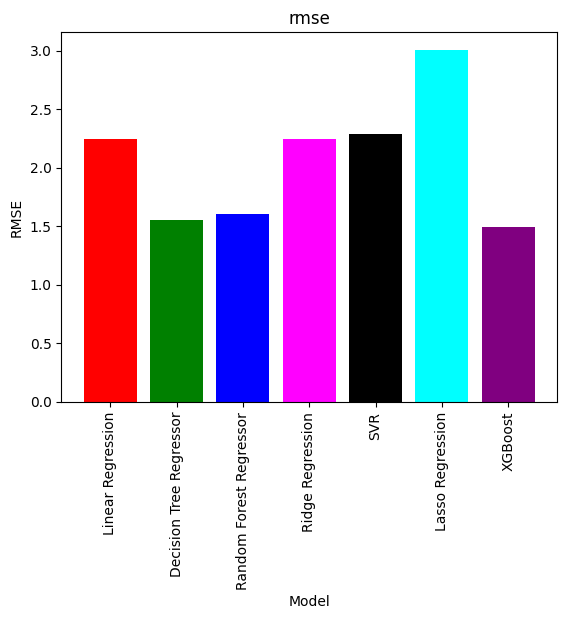

In [ ]:
plt.title('rmse')
plt.bar(best_score_rmse['Name'], best_score_rmse['RMSE'],
        color = ['red','green','blue','magenta', 'black', 'cyan','purple'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation = 90)

### **comparison between predict and actual values**

In [ ]:
frames = [y_pred_XGB, y_test]
result_pred = pd.DataFrame(data=frames)
result_pred=result_pred.T

result_pred_rf=result_pred.rename(columns={0:'Predict',1:'Real'})
result_pred_rf["Predict"]=result_pred_rf["Predict"].map(lambda x:round(x,2))
result_pred_rf["Diff"]=abs(result_pred_rf["Predict"]-result_pred_rf["Real"])
result_pred_rf["Diff"]=result_pred_rf["Diff"]
print("Mean Diff: ",abs(result_pred_rf["Diff"]).mean())
result_pred_rf.head(20)

Mean Diff:  1.4313503253796098


,Predict,Real,Diff
0,171.83,174.0,2.17
1,183.30,185.0,1.70
2,297.99,297.0,0.99
3,306.32,308.0,1.68
4,239.13,237.0,2.13
5,257.11,260.0,2.89
6,319.97,320.0,0.03
7,240.58,240.0,0.58
8,214.22,212.0,2.22
9,225.43,225.0,0.43


<Axes: xlabel='Predict', ylabel='Real'>

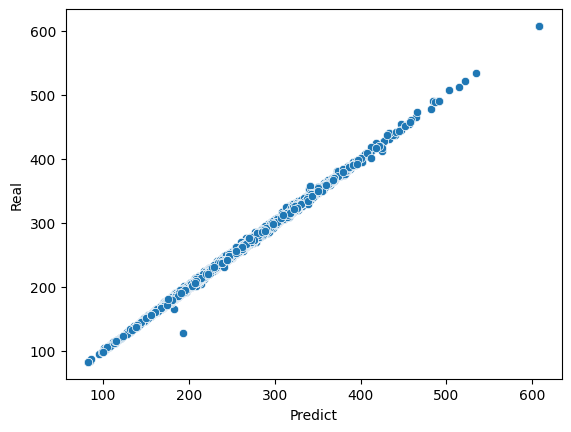

In [ ]:
sns.scatterplot(x = 'Predict', y = 'Real', data=result_pred_rf)

### **test on new prediction**

* [1,0,0,0] : diesel
* [0,1,0,0] : ethanol
* [0,1,0,0] : ethanol
* [0,0,1,0] : regular gazoline
* [0,0,0,1] : premium gazoline

In [ ]:
engine_size = 0
Cylinders = 0
fuel_consumption = 0
fuel_type = ""
while engine_size == 0 and Cylinders == 0 and fuel_consumption == 0:
    engine_size_str = input("Engine Size : ")
    Cylinders_str = input("Cylinders : ")
    fuel_consumption_str = input("Fuel Consumption : ")
    try:
        engine_size = float(engine_size_str)
        Cylinders = float(Cylinders_str)
        fuel_consumption = float(fuel_consumption_str)
    except ValueError:
        print("ERREUR: Veuillez entrer un nombre")

while fuel_type == "":
  fuel_type = input("fuel_type : ")
  fuel_type = fuel_type.lower()


if fuel_type == "diesel":
  new_prediction = XGB.predict([[engine_size,Cylinders, fuel_consumption, 1, 0, 0, 0]])
  print('CO2 prediction is :', new_prediction)
elif fuel_type == "ethanol":
  new_prediction = XGB.predict([[engine_size,Cylinders, fuel_consumption, 0, 1, 0, 0]])
  print('CO2 prediction is :', new_prediction)
elif fuel_type == "regular gazoline":
  new_prediction = XGB.predict([[engine_size,Cylinders, fuel_consumption, 0, 0, 1, 0]])
  print('CO2 prediction is :', new_prediction)
elif fuel_type == "premium gazoline":
  new_prediction = XGB.predict([[engine_size,Cylinders, fuel_consumption, 0, 0, 0, 1]])
  print('CO2 prediction is :', new_prediction)
else:
  print("Veuillez entrer un des noms des carburants suivantant: diesel, ethanol, regular gazoline, premium gazoline")

Engine Size : 8
Cylinders : 9
Fuel Consumption : 14
fuel_type : ETHANOL
CO2 prediction is : [225.32828]
